In [1]:
from model import *
from data import *
from PIL import Image
import cv2
from glob import glob
import random
from skimage.io import imread
from matplotlib import pyplot as plt
import skimage.transform as trans

In [2]:
base_path = '/data/spacenet/bldg/AllValid/'
valid_path = os.path.join(base_path,'PAN-PNG/')
valid_images = glob(valid_path + '*.png')
image_size = (256, 256, 1)
sample_size = 4

In [3]:
model = unet()
model.load_weights('/lfs/jonas/oldunet/weights.hdf5')

In [14]:
valid_sample = random.sample(valid_images, sample_size)
samp_imgs = []
valid_GTs = []
samp_resizes = []
for sample in valid_sample:
    samp_filename = os.path.split(sample)[1]
    GT_path = os.path.join(os.path.join(base_path, 'GT-PNG', samp_filename))
    valid_GT = imread(GT_path)[:,:,0]
    valid_GTs += [valid_GT]
    samp_img = imread(sample)
    samp_imgs += [samp_img]
samp_imgs = np.array(samp_imgs)
valid_GTs = np.array(valid_GTs)

for samp_img in samp_imgs:
    #ranCor = np.int16(random.uniform(0, samp_img.shape[0]-image_size[0]))
    #samp_img = samp_img[ranCor:ranCor+image_size[0], ranCor:ranCor+image_size[1]].reshape(image_size)
    samp_resize = trans.resize(samp_img, image_size)[:,:,0]
    samp_resizes += [samp_resize]
samp_resizes = np.array(samp_resizes)

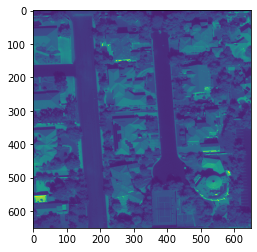

In [15]:
plt.imshow((valid_GTs[0]-255), cmap="Greys")
plt.imshow(samp_imgs[0])

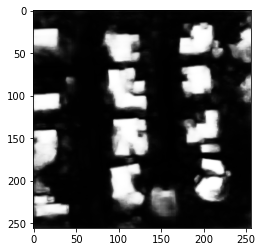

In [16]:
preds = model.predict(samp_resizes)

In [92]:
colorImg = cv2.cvtColor(samp_imgs[0], cv2.COLOR_GRAY2RGB)
img_shape = colorImg.shape
GTimg = np.zeros(img_shape)
GTimg[:,:,1] = 255 * (valid_GTs[0] - 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


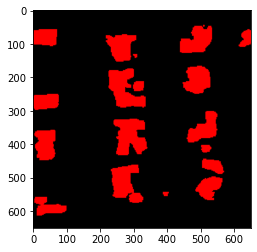

In [93]:
pred = preds[0][:,:]
pred = (abs(255 * (pred - 1)))
pred = map(lambda x: 0 if(x < 1) else x, pred)
predReshape = cv2.resize(thresh, img_shape[0:2])
predImg = np.zeros(img_shape)
predImg[:,:,0] = predReshape
plt.imshow(predImg)


In [94]:
blend = np.int16((0.75 * colorImg) + (0.25 * GTimg) + (0.5 * predImg))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


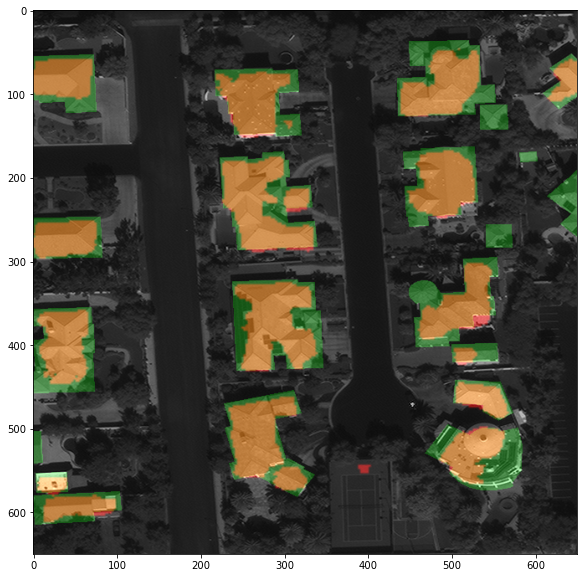

In [95]:
plt.figure(figsize = (10,10))
plt.imshow(blend)
plt.savefig('Bldg.png')